**Importando bibliotecas necessárias**

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,  StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Carregando dados do forms**

In [257]:
df = pd.read_excel('Forms_ConstruConecta.xlsx')

**Pré-processamento dos Dados**

In [258]:
# Realizamos a limpeza e o pré-processamento dos dados, incluindo a remoção de colunas desnecessárias e o tratamento de erros
# Removend colunas que não serão utilizadas
df = df.drop(['Faixa_Etaria', 'Funcionalidade_no_App', 'Índice'], axis=1)

# Tratando erros na coluna 'Realizaria_Reforma'
df['Realizaria_Reforma'] = df['Realizaria_Reforma'].replace('Sim;Não', 'Sim')

**Transformando o tipo da Variável de Resposta para numérico**

In [259]:
#Convertemos a coluna de resposta Usuaria_App de valores categóricos ('Sim' e 'Não') para valores numéricos (1 e 0). Fizemos isso para que o modelo de machine learning possa processar esses dados
# Convertendo resposta para numérico
df['Usuaria_App'] = df['Usuaria_App'].map({'Sim': 1, 'Não': 0})

**Separação de Atributos e Resposta**

In [260]:
# Aqui separamos os atributos (variáveis independentes) da resposta (variável dependente). Isso é uma preparaçaõ para a divisão dos dados em conjuntos de treino e teste
# Separando em atributos (X) e resposta (y)
X = df.drop('Usuaria_App', axis=1)
y = df['Usuaria_App']

In [261]:
X

,Dificuldade_Materiais_Pessoas,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Valorizacao_Sustentabilidade
0,Não,Não,Não Informado,Sim,Sim,Não,Importante
1,Sim,Sim,Custo,Não,Sim,Não,Muito Importante
2,Sim,Sim,Profissionais Qualificados,Não,Sim,Sim,Muito Importante
3,Sim,Não,Não Informado,Não,Sim,Sim,Muito Importante
4,Sim,Sim,Profissionais Qualificados,Sim,Sim,Não,Importante
...,...,...,...,...,...,...,...
267,Sim,Sim,Profissionais Qualificados,Sim,Sim,Não,Importante
268,Sim,Não,Não Informado,Não,Sim,Não Informado,Muito Importante
269,Sim,Sim,Profissionais Qualificados,Não,Sim,Não,Importante
270,Sim,Sim,Profissionais Qualificados,Não,Sim,Não,Muito Importante


**Divisão dos Dados em Conjuntos de Treino e Teste**

In [262]:
# Dividimos os dados em conjuntos de treino e teste, usando 20% dos dados para testes, com uma semente (random_state) de 42
# Separando em conjunto de treino e teste com random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [263]:
display(X_train)

,Dificuldade_Materiais_Pessoas,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Valorizacao_Sustentabilidade
33,Sim,Não,Não Informado,Não,Sim,Não,Importante
184,Sim,Sim,Custo,Sim,Sim,Sim,Muito Importante
142,Sim,Sim,Bons Materiais,Sim,Sim,Sim,Importante
197,Sim,Sim,Profissionais Qualificados,Sim,Sim,Não,Muito Importante
37,Sim,Sim,Bons Materiais,Não,Sim,Não,Muito Importante
...,...,...,...,...,...,...,...
188,Sim,Sim,Não Informado,Sim,Não,Não,Pouco Importante
71,Sim,Sim,Profissionais Qualificados,Não,Sim,Não,Muito Importante
106,Não,Sim,Custo,Sim,Sim,Não,Muito Importante
270,Sim,Sim,Profissionais Qualificados,Não,Sim,Não,Muito Importante


**Criação da Pipeline**

In [264]:
# Facilitando o fluxo de trabalho para a criação e aplicação do modelo
# Criando uma pipeline que possui o classificador e o  OrdinalEncoder, para transformação do tipo dos dados atributos
pipeline = Pipeline([
    ('encoder', OrdinalEncoder()),  
    ('classifier', GaussianNB())       
])

**Avaliação do Modelo com Validação Cruzada**

In [265]:
# Usando validação cruzada para avaliar o modelo no conjunto de treino
#scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
skf = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=skf)

# Mostrando resultados da validação cruzada
print("Acurácia com a validação cruzada no conjunto de treino: {:.2f}%".format(y_pred.mean() * 100))


Acurácia com a validação cruzada no conjunto de treino: 93.09%


In [266]:
# Calcular matrizes de confusão para cada fold
conf_matrices = [confusion_matrix(y[test_index], y_pred[test_index])
                 for train_index, test_index in skf.split(X_train, y_train)]

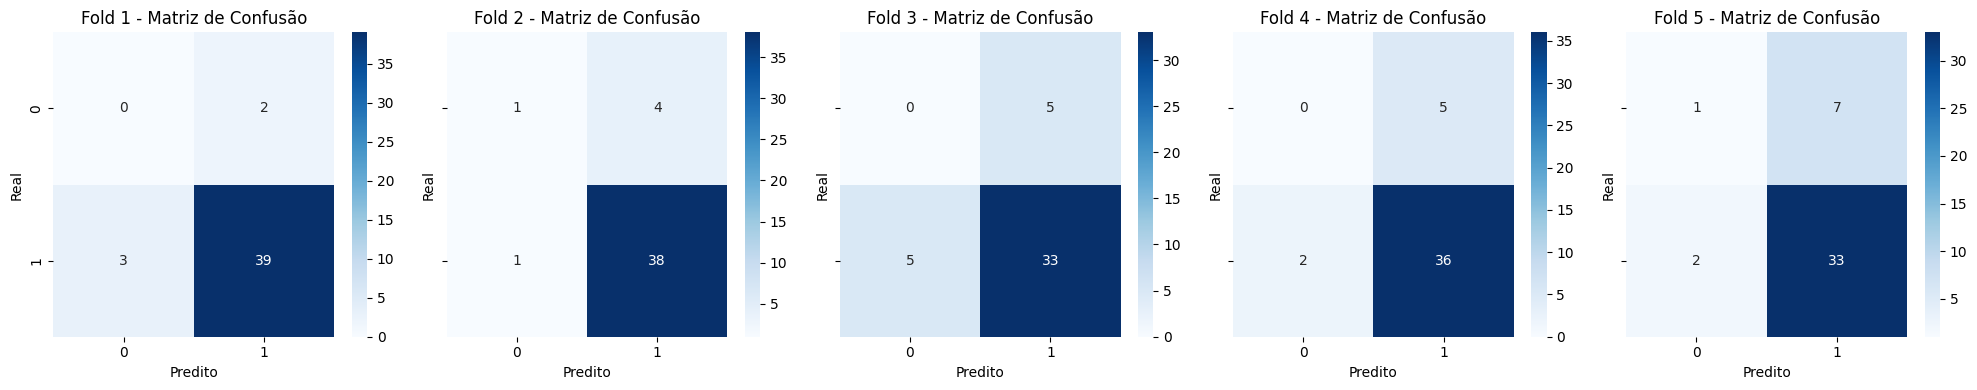

In [271]:
# Plotar as matrizes de confusão para cada fold
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey='row')
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(f'Fold {i+1} - Matriz de Confusão')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()

In [274]:
# Acurácia para cada fold
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    fold_y_pred = y_pred[test_index]
    fold_y_true = y_train.iloc[test_index] 
    fold_accuracy = accuracy_score(fold_y_true, fold_y_pred)
    print(f'Acurácia do Fold {i+1}: {fold_accuracy:.5f}')

    


Acurácia do Fold 1: 0.81818
Acurácia do Fold 2: 0.84091
Acurácia do Fold 3: 0.79070
Acurácia do Fold 4: 0.90698
Acurácia do Fold 5: 0.83721


**Treinamento do Modelo**

In [267]:
# Treinando o modelo com os dados de treino. Aqui é onde a pipeline vai aplicar o OrdinalEncoder e GaussianNB.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoder', OrdinalEncoder()), ('classifier', GaussianNB())])

In [275]:
#VERIFICANDO SE É OU NÃO OVERFITTING

# Se a acurácia do conjunto de treinamento for significativamente maior que a do conjunto de teste, isso pode indicar overfitting.

#Acurácia alta no treino e baixa no teste: Indica overfitting.
#Acurácias próximas: Indica que o modelo está generalizando bem.

#Obs: resultado como acurácias próximas
# Avaliação no conjunto de treinamento
train_accuracy = pipeline.score(X_train, y_train)
print("Acurácia no conjunto de treinamento: {:.2f}%".format(train_accuracy * 100))

# Avaliação no conjunto de teste
test_accuracy = pipeline.score(X_test, y_test)
print("Acurácia no conjunto de teste: {:.2f}%".format(test_accuracy * 100))

Acurácia no conjunto de treinamento: 88.48%
Acurácia no conjunto de teste: 81.82%


**Avaliação**

Matriz de Confusão:
 [[ 1  4]
 [ 6 44]]


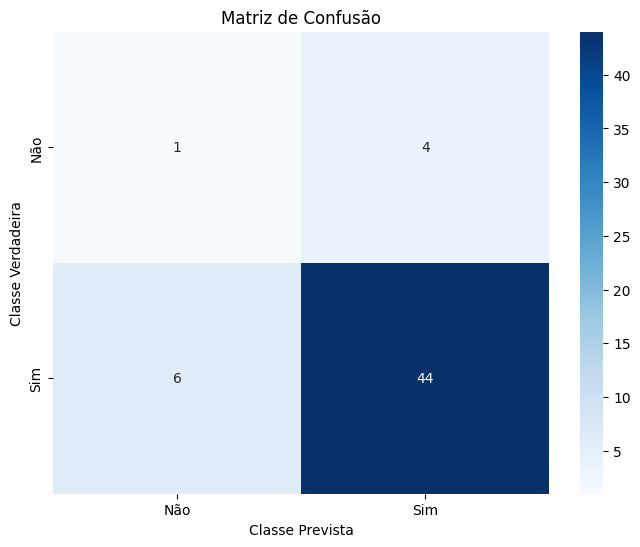

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.92      0.88      0.90        50

    accuracy                           0.82        55
   macro avg       0.53      0.54      0.53        55
weighted avg       0.85      0.82      0.83        55

Acurácia: 0.8181818181818182


In [269]:
# Testar o modelo no conjunto de teste
resultado = pipeline.predict(X_test)

matrix_conf = confusion_matrix(y_test, resultado)
print("Matriz de Confusão:\n", matrix_conf)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
print(classification_report(y_test, resultado))

# Acurácia
acuracia = accuracy_score(y_test, resultado)
print("Acurácia:", acuracia)

**Avaliação do Modelo no Conjunto de Teste**

In [270]:
# E ao final, avaliamos o modelo com conjunto de teste para ver a performance desse modelo em dados que não foram usados no treinamento
# Avaliando o modelo no conjunto de teste
test_accuracy = pipeline.score(X_test, y_test)
print("Acurácia no conjunto de teste: {:.2f}%".format(test_accuracy * 100))

Acurácia no conjunto de teste: 81.82%


**Considerações finais sobre este modelo**

## Acurácia nos Folds (Validação Cruzada)
As acurácias que você obteve para cada fold (por exemplo, 81.82%, 84.09%, etc.) representam a performance do modelo em diferentes subconjuntos do seu conjunto de treino. A média dessas acurácias (93.09%) é uma boa indicação da capacidade do modelo de generalizar para dados que não foram vistos, uma vez que considera diferentes divisões dos dados.

## Acurácia no Conjunto de Treinamento
A acurácia de 88.48% no conjunto de treinamento indica que o modelo tem um bom desempenho nos dados usados para treiná-lo. Um modelo que tem uma acurácia significativamente maior no conjunto de treinamento do que no conjunto de validação (ou teste) pode estar overfitting, ou seja, ele aprendeu padrões específicos dos dados de treinamento que não generalizam bem.

## Acurácia no Conjunto de Teste
A acurácia de 81.82% no conjunto de teste é a que você deve usar para avaliar a performance final do modelo. Este é o desempenho que você pode esperar em novos dados. Comparando com a acurácia média obtida na validação cruzada (93.09%), a diferença sugere que o modelo pode estar se ajustando muito bem aos dados de treinamento, mas não generalizando tão bem.

## Interpretação e Diagnóstico de Overfitting
- Se as acurácias de treinamento e teste forem próximas, isso é um bom sinal de que o modelo está generalizando bem.
- Se a acurácia de treinamento for muito maior que a de teste, isso pode indicar overfitting.

## Conclusões
- **Acurácia a considerar**: A acurácia no conjunto de teste (81.82%) é a mais relevante para avaliar o desempenho do seu modelo em dados não vistos.
- **Overfitting**: Para investigar overfitting, compare a acurácia de treinamento (88.48%) com a acurácia de teste (81.82%) e a média da validação cruzada (93.09%). Uma diferença significativa, especialmente em favor da acurácia de treinamento, é um sinal de que o modelo pode estar se ajustando demais aos dados de treinamento.
